<a href="https://colab.research.google.com/github/ArifAygun/CustomerEye/blob/main/Company_Reviews(Master2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### IMPORT LIBRARIES AND DATASET

In [ ]:
!pip install vaderSentiment
!pip install emoji

In [ ]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates

from wordcloud import WordCloud
from collections import Counter
import emoji

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Analysis_1/

# Read CSV files into DataFrames
df1 = pd.read_csv('Freedom_Debt_Relief2.csv')
df2 = pd.read_csv('Millennium_Trust2.csv')
df3 = pd.read_csv('Advance_America2.csv')

print(df1.info(), df1.head())
print(df2.info(), df2.head())
print(df3.info(), df3.head())

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Analysis_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             2000 non-null   float64
 1   Experience Date  2000 non-null   object 
 2   Review Date      2000 non-null   object 
 3   Reply Date       2000 non-null   object 
 4   Exp to Review    2000 non-null   int64  
 5   Review to Reply  2000 non-null   int64  
 6   Rating           2000 non-null   int64  
 7   Countries        2000 non-null   object 
 8   Reviews          2000 non-null   object 
 9   Replies          2000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 156.4+ KB
None      Year Experience Date Review Date  Reply Date  Exp to Review  \
0  2021.0      2021-04-30  2021-04-30 

## TEXT PREPROCESSING

In [ ]:
def preprocess_text_for_sentiment_analysis(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Handle emojis
    words = [emoji.demojize(word, delimiters=('', ' ')) for word in words]

    # Join tokens back into a string
    cleaned_text = ' '.join(words)

    return cleaned_text


# Apply the preprocessing function to the "Reviews" column in each DataFrame
df1['Cleaned_Reviews'] = df1['Reviews'].apply(preprocess_text_for_sentiment_analysis)
df2['Cleaned_Reviews'] = df2['Reviews'].apply(preprocess_text_for_sentiment_analysis)
df3['Cleaned_Reviews'] = df3['Reviews'].apply(preprocess_text_for_sentiment_analysis)

# Display the cleaned data
print("Cleaned DataFrame 1:")
print(df1[['Reviews', 'Cleaned_Reviews']].head())

print("\nCleaned DataFrame 2:")
print(df2[['Reviews', 'Cleaned_Reviews']].head())

print("\nCleaned DataFrame 3:")
print(df3[['Reviews', 'Cleaned_Reviews']].head())


Cleaned DataFrame 1:
                                             Reviews  \
0  FDR OVERSIGHT I typically would give FDR a 5 s...   
1  Freedom has really helped with my debt… Freedo...   
2  Everything is following through just as… Every...   
3  Started the program owing a little… Started th...   
4  I was surprised to have a settlement so… I was...   

                                     Cleaned_Reviews  
0  fdr oversight typically would give fdr star ra...  
1  freedom really helped debt freedom really help...  
2  everything following everything following expl...  
3  started program owing little started program o...  
4  surprised settlement surprised settlement quickly  

Cleaned DataFrame 2:
                                             Reviews  \
0                  Website was easy to navigate. nan   
1                           5 star Excellent service   
2  Moving monies Getting all my investments in on...   
3  The service was excellent The service was exce...   
4  User Fr

## TEXT ITEM COUNTS

In [ ]:
# Define a function to calculate and display text item counts
def calculate_and_display_text_item_counts(data, company):
    # Count the number of items in each text item
    data['Text_Item_Count'] = data['Cleaned_Reviews'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

    # Display both the text and the count of text items
    text_with_count = data[['Cleaned_Reviews', 'Text_Item_Count']]
    print(f"\nCleaned Data for {company}:")
    print(text_with_count)

    # Calculate the total number of text items across all rows
    total_text_items = data['Text_Item_Count'].sum()

    # Display the total number of text items
    print(f"Total Text Items for {company}: {total_text_items}")

# Apply the function to each DataFrame and company
calculate_and_display_text_item_counts(df1, 'Freedom Debt Relief')
calculate_and_display_text_item_counts(df2, 'Millennium Trust')
calculate_and_display_text_item_counts(df3, 'Advance America')



Cleaned Data for Company A:
                                        Cleaned_Reviews  Text_Item_Count
0     fdr oversight typically would give fdr star ra...               72
1     freedom really helped debt freedom really help...               14
2     everything following everything following expl...                7
3     started program owing little started program o...               18
4     surprised settlement surprised settlement quickly                5
...                                                 ...              ...
1995  great opportunity free debt going alot got sur...               24
1996  every time call someone every time call someon...               11
1997               sure yet sure yet still getting bill                7
1998  bit concerned understand move quicker closing ...               51
1999  cant thank freedom debt relief enough cant tha...               20

[2000 rows x 2 columns]
Total Text Items for Company A: 37377

Cleaned Data for Company B:
   

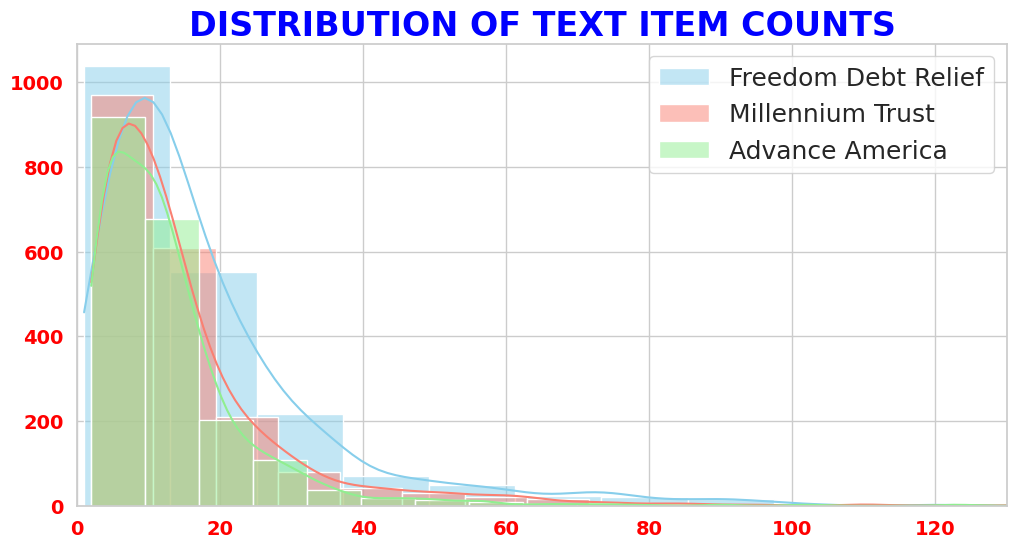

In [ ]:
# Set the style of the plot
sns.set(style="whitegrid")

# Plot the distribution of Text_Item_Count for each company
plt.figure(figsize=(12, 6))
sns.histplot(df1['Text_Item_Count'], bins=20, kde=True, color='skyblue', label='Freedom Debt Relief')
sns.histplot(df2['Text_Item_Count'], bins=20, kde=True, color='salmon', label='Millennium Trust')
sns.histplot(df3['Text_Item_Count'], bins=20, kde=True, color='lightgreen', label='Advance America')

# Set title
plt.title('DISTRIBUTION OF TEXT ITEM COUNTS', fontsize=24, fontweight='bold', color='blue')

# Set maximum x-axis limit
plt.xlim(0, 130)

# Hide x and y labels
plt.xlabel('')
plt.ylabel('')

# Customize x and y ticks
plt.xticks(fontsize=14, fontweight='bold', color='red')
plt.yticks(fontsize=14, fontweight='bold', color='red')

# Show legend
plt.legend(fontsize=18)

# Show the plot
plt.show()

## WORDCLOUDS

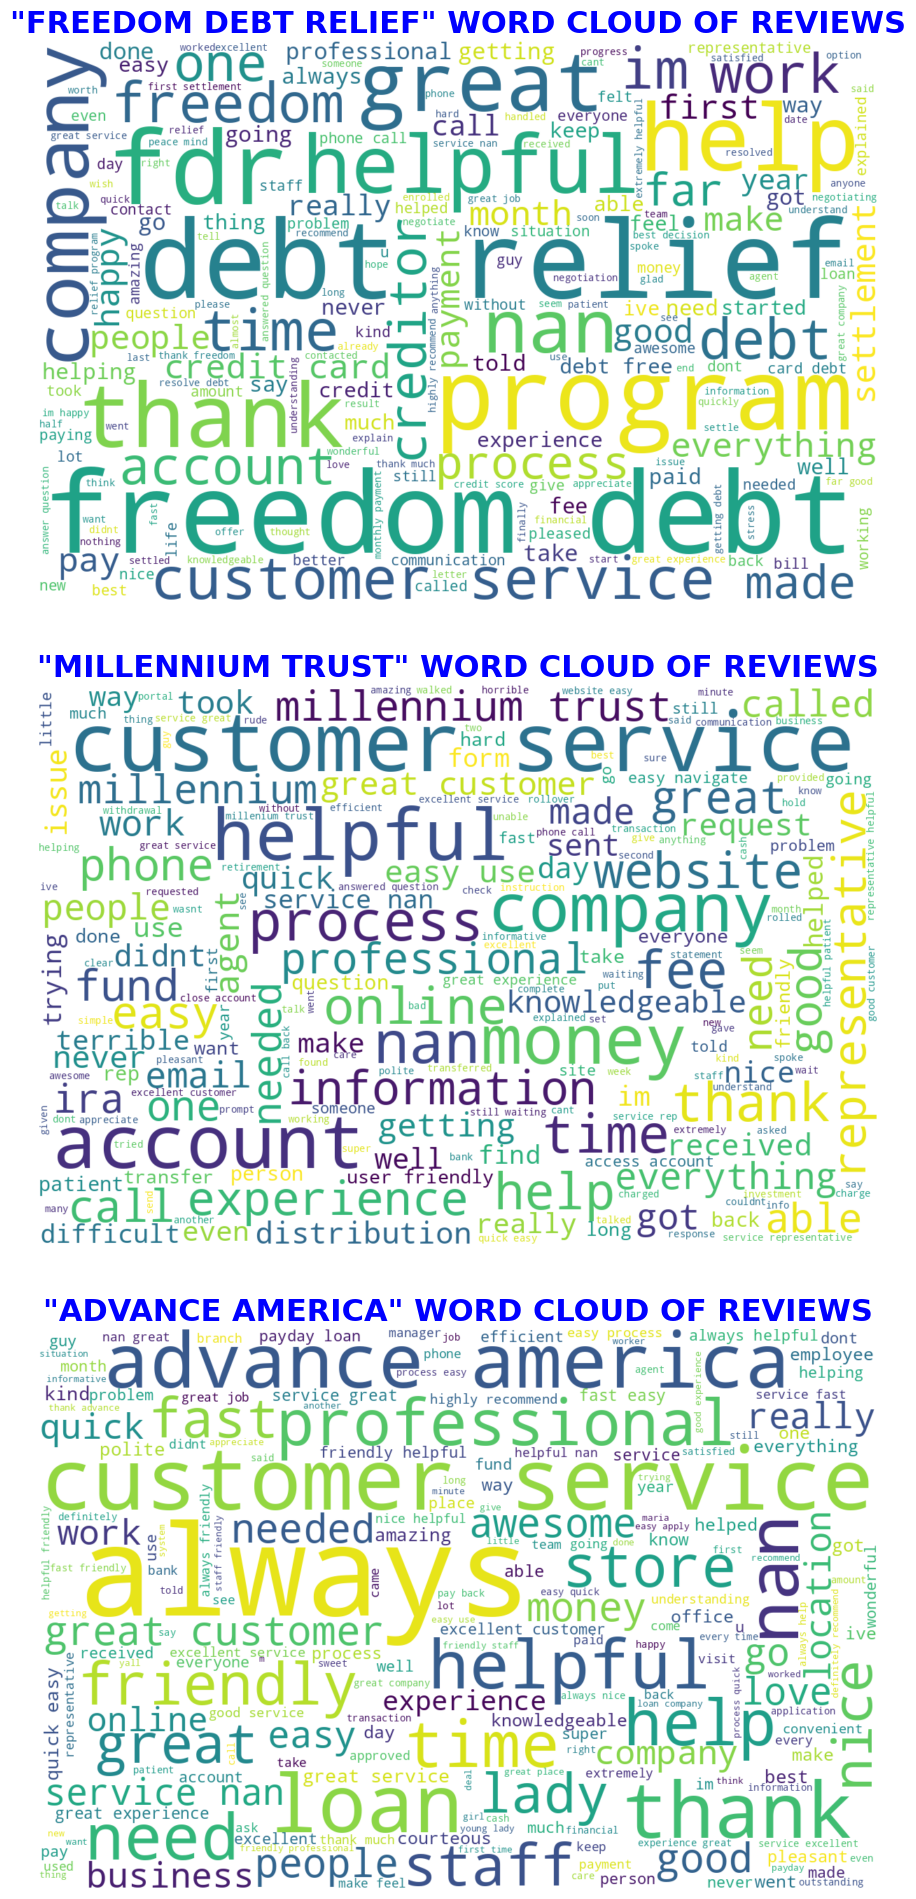

In [ ]:
# Function to generate and display word cloud with a light color background
def generate_and_display_wordcloud(data, title, vertical_gap, ax):
    # Generate the word cloud with a light color background
    wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(' '.join(data.dropna()))

    # Sort the word cloud in descending order
    sorted_wordcloud = dict(sorted(wordcloud.words_.items(), key=lambda item: item[1], reverse=True))

    # Get the top 30 results
    top_30 = dict(list(sorted_wordcloud.items())[:50])

    # Set the subplot's title
    ax.set_title(title, fontsize=22, fontweight='bold', color='blue')

    # Add top and bottom gaps between word clouds
    plt.subplots_adjust(hspace=vertical_gap)

    # Display the word cloud on the subplot
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')

# Create subplots for the three DataFrames
fig, axs = plt.subplots(3, 1, figsize=(12, 24))

# Apply the function to your DataFrames with subplots
generate_and_display_wordcloud(df1['Cleaned_Reviews'], '"FREEDOM DEBT RELIEF" WORD CLOUD OF REVIEWS', vertical_gap=0.15, ax=axs[0])
generate_and_display_wordcloud(df2['Cleaned_Reviews'], '"MILLENNIUM TRUST" WORD CLOUD OF REVIEWS', vertical_gap=0.15, ax=axs[1])
generate_and_display_wordcloud(df3['Cleaned_Reviews'], '"ADVANCE AMERICA" WORD CLOUD OF REVIEWS', vertical_gap=0.15, ax=axs[2])

# Show the subplots
plt.show()


## MOST COMMON WORDS

<ipython-input-30-6442183ca03d>:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


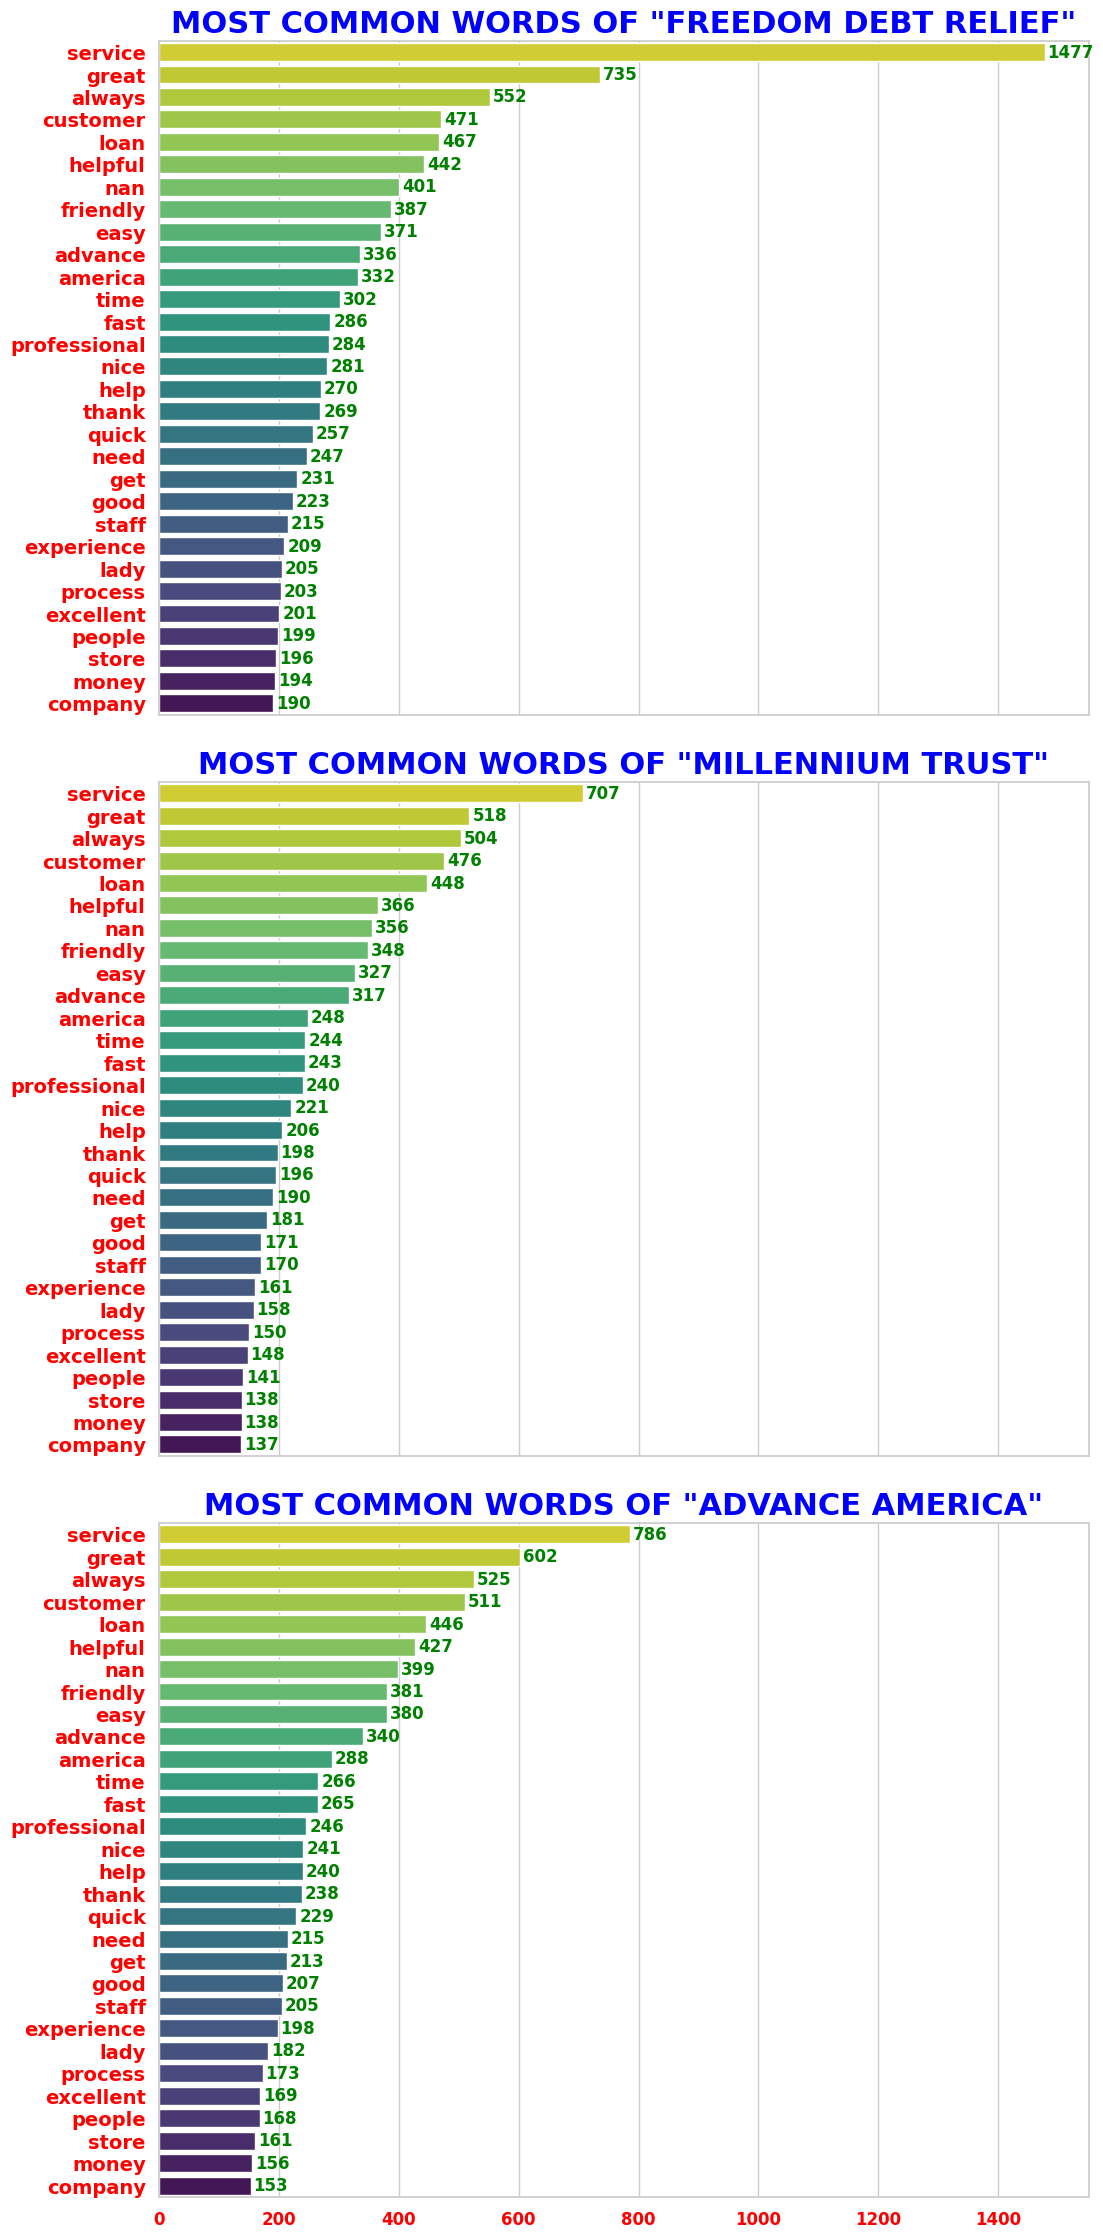

In [ ]:
# Function to calculate word counts, display the top 30 words, and create a bar chart with gradient colors
def calculate_display_and_chart_word_counts(data, title, ax, top_n=30):
    # Concatenate and split the text, handling NaN values
    all_words = ' '.join(str(text) for text in data if pd.notna(text)).split()

    # Count the occurrences of each word
    word_counts = Counter(all_words)

    # Sort the word counts in descending order
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

    # Create a DataFrame for the first 30 most common words
    word_counts_df = pd.DataFrame(list(sorted_word_counts.items()), columns=['Word', 'Count'])

    # Create a horizontal bar chart with gradient colors for the top 30 words
    top_words = list(sorted_word_counts.keys())[:top_n][::-1]  # Reverse the order
    top_word_counts = list(sorted_word_counts.values())[:top_n][::-1]  # Reverse the order

    # Create a color map with gradient colors
    color_map = sns.color_palette("viridis", n_colors=top_n)

    # Add spacing between bars by adjusting the width
    bar_width = 0.8
    bars = sns.barplot(x=top_word_counts, y=top_words, palette=color_map, order=top_words, ax=ax)

    # Add data values on each bar with custom font size, weight, and color
    for bar, count in zip(bars.patches, top_word_counts):
        ax.text(bar.get_width() + 5, bar.get_y() + bar_width / 2, str(count),
                va='center', fontsize=12, fontweight='bold', color='green')

    # Set axis labels and invert the y-axis for better readability
    ax.invert_yaxis()

    # Add a title with specified properties
    ax.set_title(f'MOST COMMON WORDS OF {title}', fontsize=22, fontweight='bold', color='blue')

    # Customize xticks and yticks
    ax.tick_params(axis='both', which='major', labelsize=12, color='red', width=4, length=6)
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)

# Create subplots for the three DataFrames in a single column with three rows, add more gap between subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 28), sharex=True, gridspec_kw={'hspace': 0.1})

# Apply the function to your DataFrames with subplots
calculate_display_and_chart_word_counts(df1['Cleaned_Reviews'], '"FREEDOM DEBT RELIEF"', axs[0])
calculate_display_and_chart_word_counts(df2['Cleaned_Reviews'], '"MILLENNIUM TRUST"', axs[1])
calculate_display_and_chart_word_counts(df3['Cleaned_Reviews'], '"ADVANCE AMERICA"', axs[2])

# Set yticks and format for all subplots to ensure consistency
yticks = axs[2].get_yticks()
yticklabels = axs[2].get_yticklabels()
for ax in axs:
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels, fontsize=14, color='red', weight='bold')

# Customize xticks for all subplots
for ax in axs:
    ax.tick_params(axis='x', which='major', labelsize=12, color='red', width=4, length=6)

# Customize xticks for the entire figure
plt.xticks(fontsize=12, color='red', weight='bold')

# Show the subplots
plt.tight_layout()
plt.show()


<ipython-input-31-c43e736ed017>:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


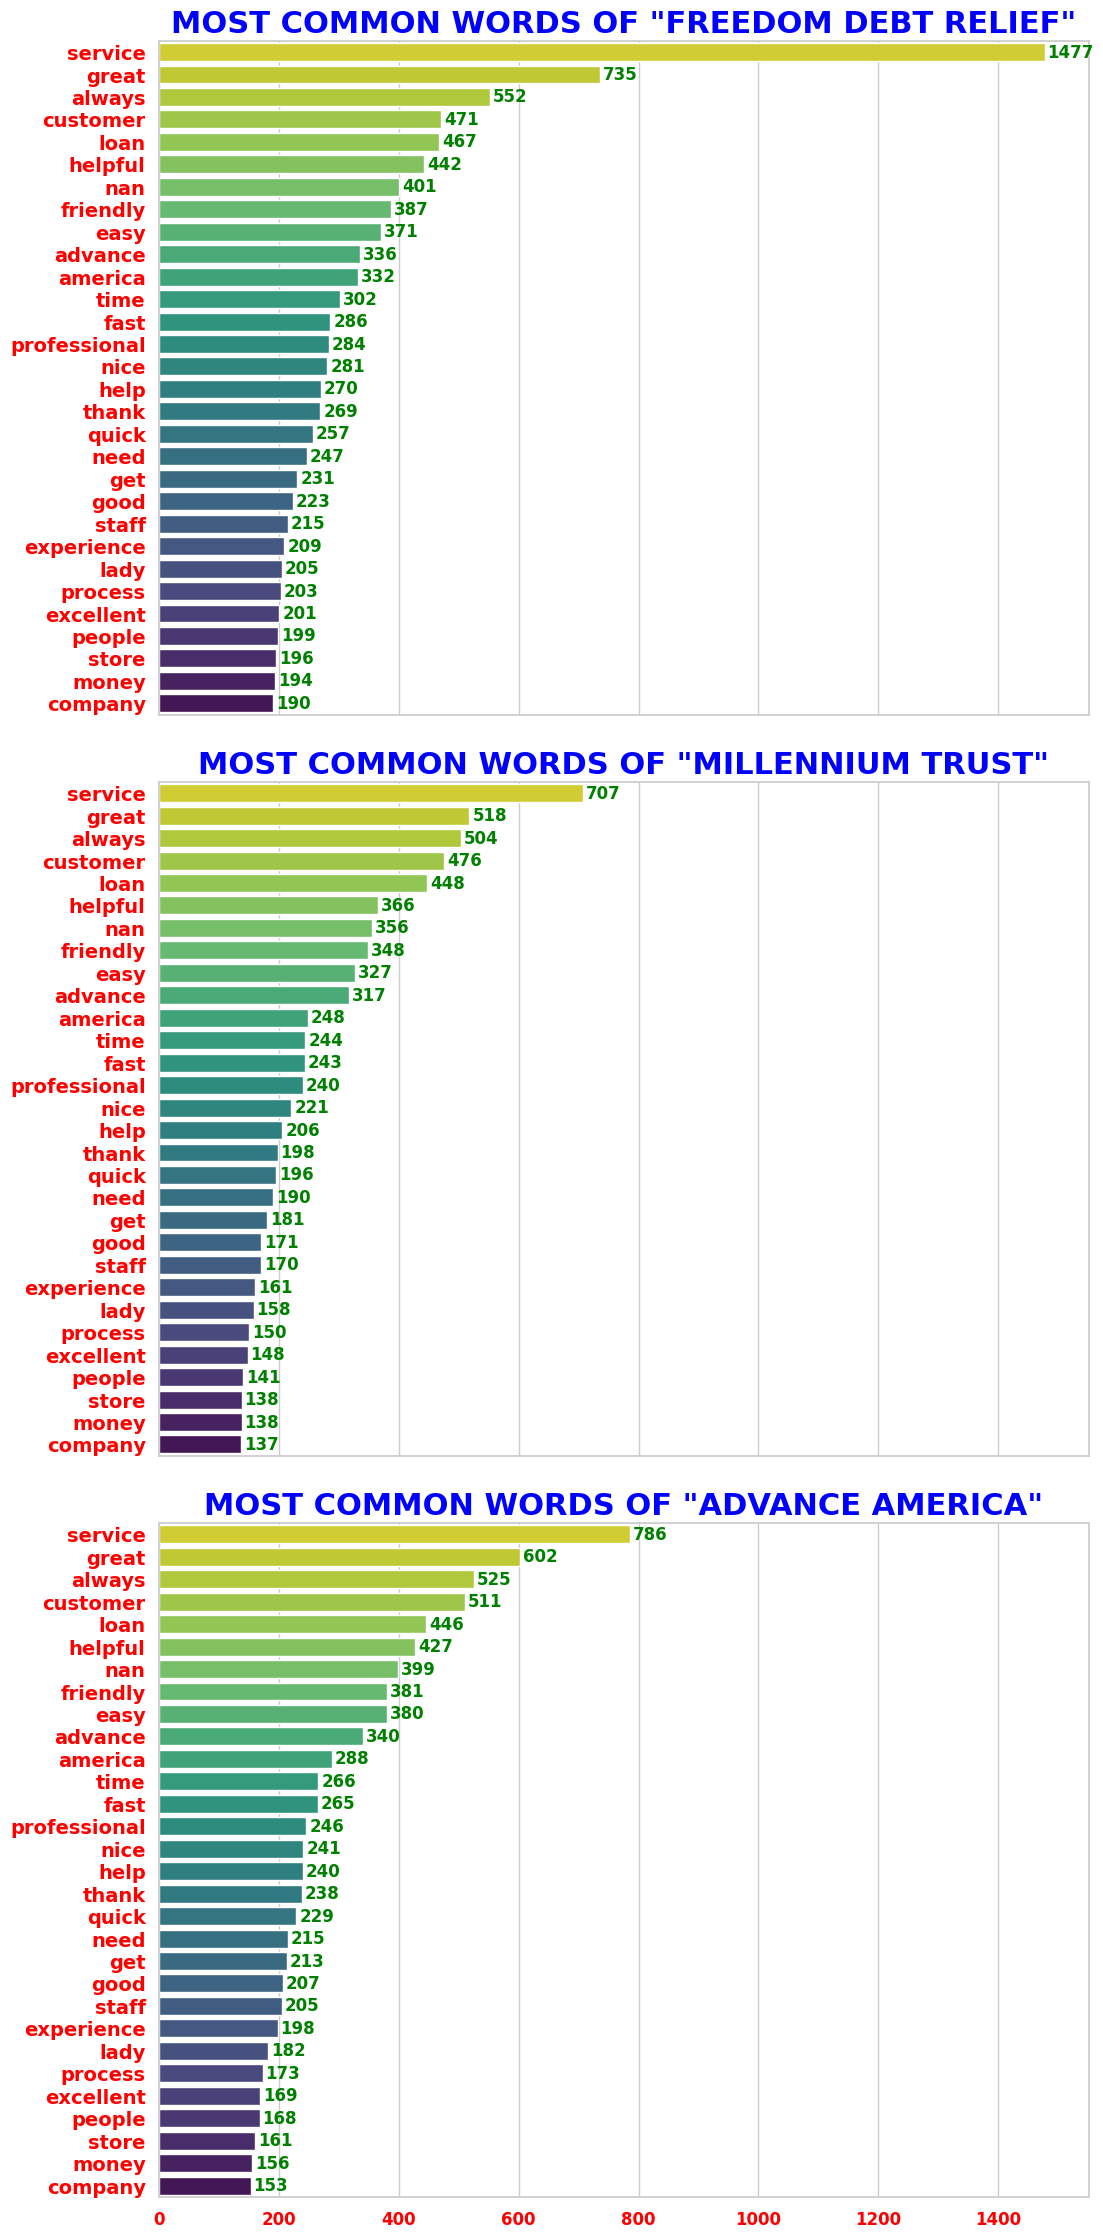

In [ ]:
# Function to calculate word counts and return the sorted word counts
def calculate_word_counts(data):
    all_words = ' '.join(str(text) for text in data if pd.notna(text)).split()
    word_counts = Counter(all_words)
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    return sorted_word_counts

# Get the sorted word counts for each DataFrame
word_counts_df1 = calculate_word_counts(df1['Cleaned_Reviews'])
word_counts_df2 = calculate_word_counts(df2['Cleaned_Reviews'])
word_counts_df3 = calculate_word_counts(df3['Cleaned_Reviews'])

# Combine word counts from all DataFrames
combined_word_counts = {word: word_counts_df1.get(word, 0) + word_counts_df2.get(word, 0) + word_counts_df3.get(word, 0)
                        for word in set(word_counts_df1) | set(word_counts_df2) | set(word_counts_df3)}

# Sort the combined word counts
sorted_combined_word_counts = dict(sorted(combined_word_counts.items(), key=lambda item: item[1], reverse=True))

# Create subplots for the three DataFrames in a single column with three rows, add more gap between subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 28), sharex=True, gridspec_kw={'hspace': 0.1})

# Apply the function to the combined word counts
calculate_display_and_chart_word_counts(df1['Cleaned_Reviews'], '"FREEDOM DEBT RELIEF"', axs[0], top_n=30)
calculate_display_and_chart_word_counts(df2['Cleaned_Reviews'], '"MILLENNIUM TRUST"', axs[1], top_n=30)
calculate_display_and_chart_word_counts(df3['Cleaned_Reviews'], '"ADVANCE AMERICA"', axs[2], top_n=30)

# Set yticks and format for all subplots to ensure consistency
yticks = axs[2].get_yticks()
yticklabels = axs[2].get_yticklabels()
for ax in axs:
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels, fontsize=14, color='red', weight='bold')

# Customize xticks for all subplots
for ax in axs:
    ax.tick_params(axis='x', which='major', labelsize=12, color='red', width=4, length=6)

# Customize xticks for the entire figure
plt.xticks(fontsize=12, color='red', weight='bold')

# Show the subplots
plt.tight_layout()
plt.show()


<ipython-input-33-03af919d8308>:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


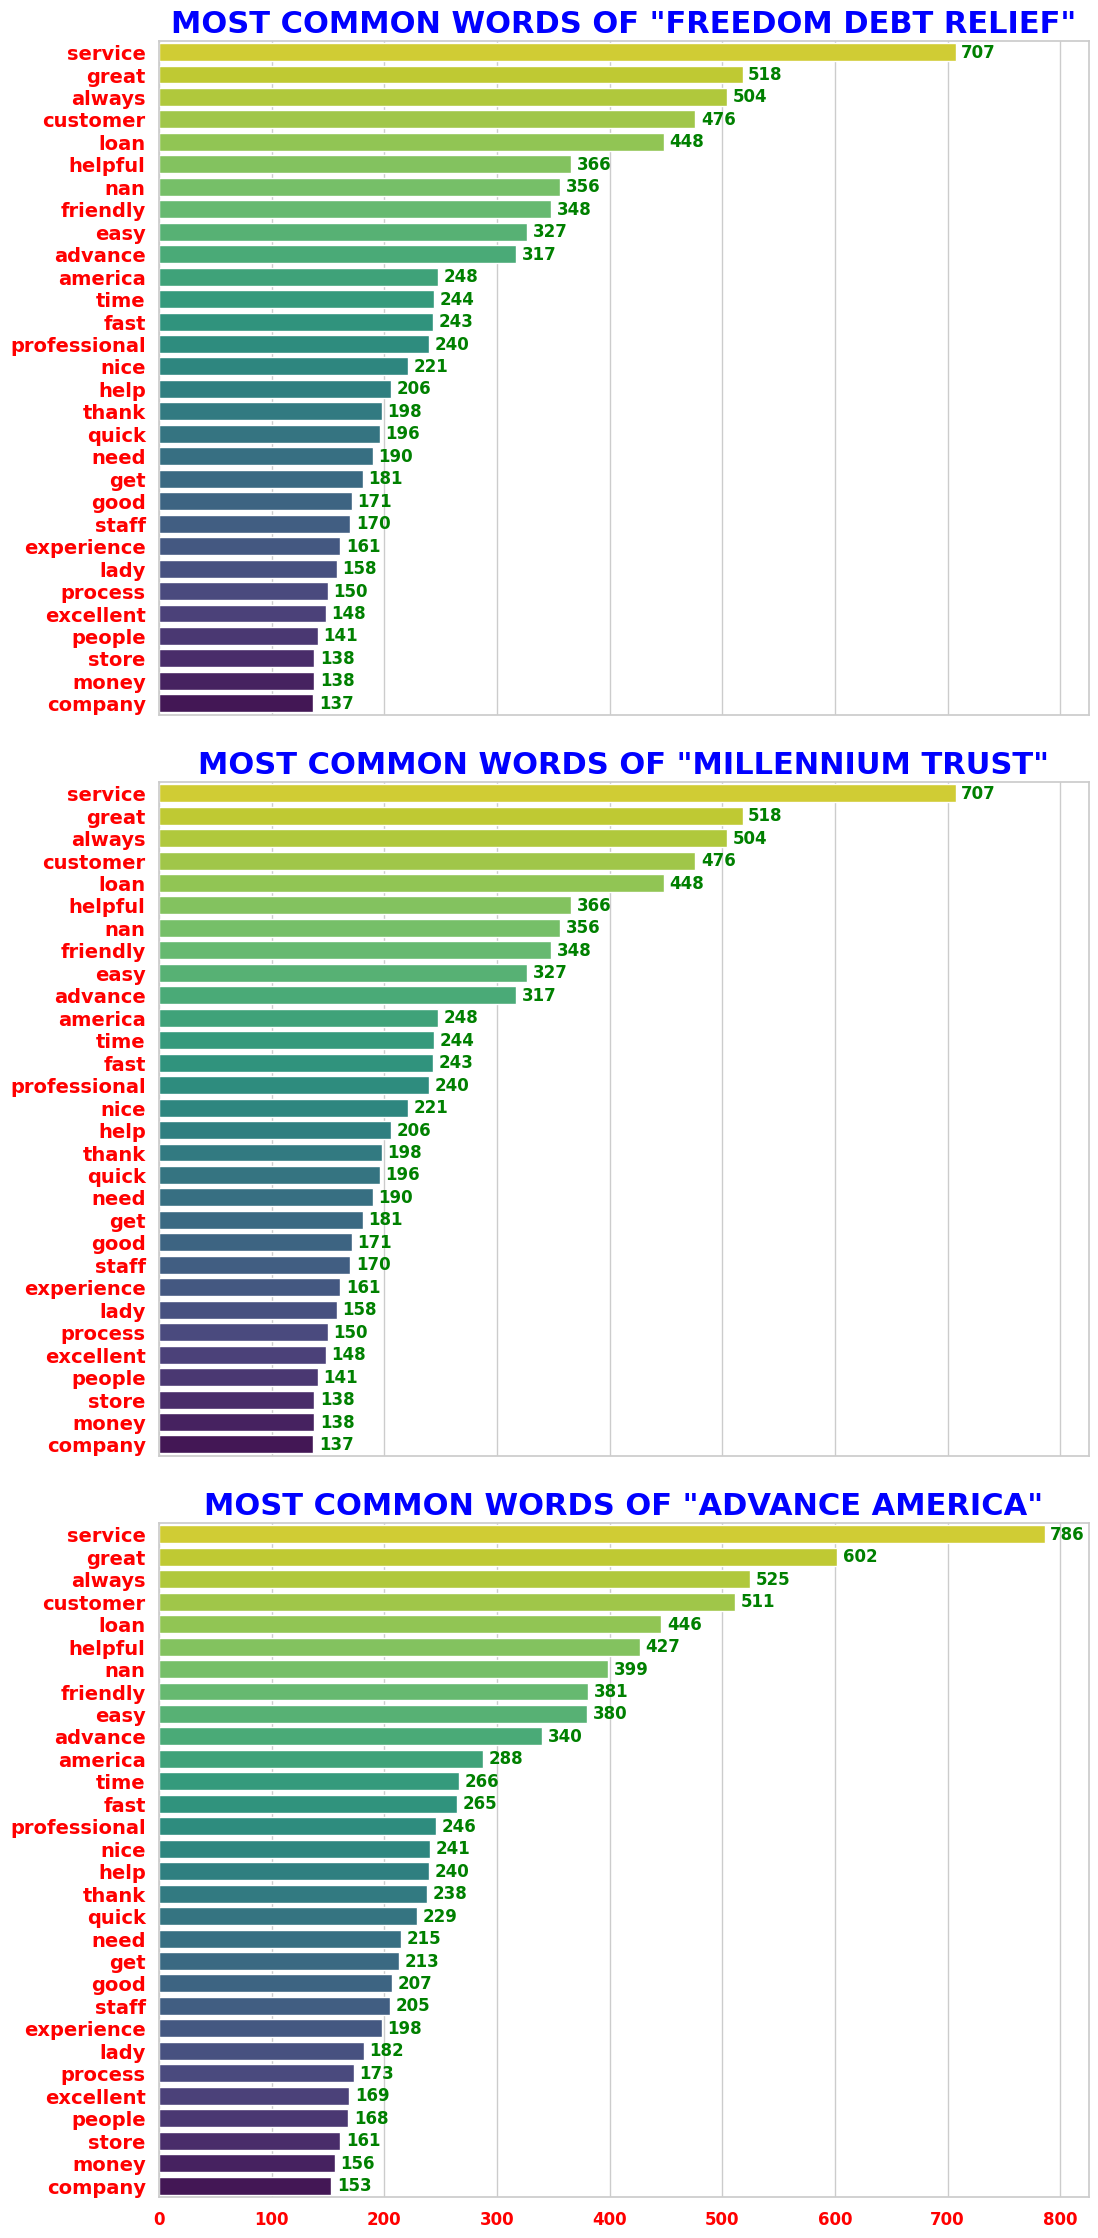

In [ ]:
# Function to calculate word counts, display the top 30 words, and create a bar chart with gradient colors
def calculate_display_and_chart_word_counts(data, title, ax, top_n=30):
    # Concatenate and split the text, handling NaN values
    all_words = ' '.join(str(text) for text in data if pd.notna(text)).split()

    # Count the occurrences of each word
    word_counts = Counter(all_words)

    # Sort the word counts in descending order
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

    # Create a DataFrame for the first 30 most common words
    word_counts_df = pd.DataFrame(list(sorted_word_counts.items()), columns=['Word', 'Count'])

    # Create a horizontal bar chart with gradient colors for the top 30 words
    top_words = list(sorted_word_counts.keys())[:top_n][::-1]  # Reverse the order
    top_word_counts = list(sorted_word_counts.values())[:top_n][::-1]  # Reverse the order

    # Create a color map with gradient colors
    color_map = sns.color_palette("viridis", n_colors=top_n)

    # Add spacing between bars by adjusting the width
    bar_width = 0.8
    bars = sns.barplot(x=top_word_counts, y=top_words, palette=color_map, order=top_words, ax=ax)

    # Add data values on each bar with custom font size, weight, and color
    for bar, count in zip(bars.patches, top_word_counts):
        ax.text(bar.get_width() + 5, bar.get_y() + bar_width / 2, str(count),
                va='center', fontsize=12, fontweight='bold', color='green')

    # Set axis labels and invert the y-axis for better readability
    ax.invert_yaxis()

    # Add a title with specified properties
    ax.set_title(f'MOST COMMON WORDS OF {title}', fontsize=22, fontweight='bold', color='blue')

    # Customize xticks and yticks
    ax.tick_params(axis='both', which='major', labelsize=12, color='red', width=4, length=6)
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)

# Create subplots for the three DataFrames in a single column with three rows, add more gap between subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 28), sharex=True, gridspec_kw={'hspace': 0.1})

# Apply the function to your DataFrames with subplots separately
calculate_display_and_chart_word_counts(df2['Cleaned_Reviews'], '"FREEDOM DEBT RELIEF"', axs[0])
calculate_display_and_chart_word_counts(df2['Cleaned_Reviews'], '"MILLENNIUM TRUST"', axs[1])
calculate_display_and_chart_word_counts(df3['Cleaned_Reviews'], '"ADVANCE AMERICA"', axs[2])

# Set yticks and format for all subplots to ensure consistency
yticks = axs[2].get_yticks()
yticklabels = axs[2].get_yticklabels()
for ax in axs:
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels, fontsize=14, color='red', weight='bold')

# Customize xticks for all subplots
for ax in axs:
    ax.tick_params(axis='x', which='major', labelsize=12, color='red', width=4, length=6)

# Customize xticks for the entire figure
plt.xticks(fontsize=12, color='red', weight='bold')

# Show the subplots
plt.tight_layout()
plt.show()


# SENTIMENT ANALYSIS

In [ ]:
# Function for Sentiment Analysis using TextBlob
def analyze_sentiment_tb(processed_content):
    analysis = TextBlob(processed_content)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Function for Sentiment Analysis using VADER Sentiment Analysis
def analyze_sentiment_vader(processed_content):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(processed_content)
    return sentiment_scores

# Function to assign sentiment scores
def assign_sentiment_score(sentiment):
    if sentiment == 'positive':
        return 5
    elif sentiment == 'neutral':
        return 3
    else:
        return 1

# Function to calculate a new rating
def calculate_new_rating(sentiment_score):
    # You can customize this formula as needed
    return (sentiment_score * 5) / 3

# Function to compare given and calculated ratings
def compare_ratings(given_rating, calculated_rating):
    # Calculate the difference between given and calculated ratings
    rating_difference = given_rating - calculated_rating
    return rating_difference

# Apply sentiment analysis to the 'Review' column for each company's DataFrame
for i, df in enumerate([df1, df2, df3], start=1):
    company_label = chr(ord('A') + i - 1)  # Convert 1, 2, 3 to A, B, C

    # Using TextBlob for sentiment analysis
    df[f'Sentiment_Label_TB_{company_label}'] = df['Reviews'].apply(lambda x: analyze_sentiment_tb(str(x)) if pd.notna(x) else 'neutral')

    # Using VADER Sentiment Analysis
    analyzer = SentimentIntensityAnalyzer()
    df[f'Sentiment_Scores_VADER_{company_label}'] = df['Reviews'].apply(lambda x: analyze_sentiment_vader(str(x)) if pd.notna(x) else {'compound': 0, 'neg': 0, 'neu': 0, 'pos': 0})
    df[f'Sentiment_Label_VADER_{company_label}'] = df[f'Sentiment_Scores_VADER_{company_label}'].apply(lambda x: 'positive' if x['compound'] > 0 else ('negative' if x['compound'] < 0 else 'neutral'))

    # Print the sentiment labels for each company
    print(f"\nSentiment Labels for Company {company_label}:")
    print(df[f'Sentiment_Label_TB_{company_label}'])

    # Calculate and print the difference between given and calculated ratings
    given_ratings = df['Rating']
    calculated_ratings = df[f'Sentiment_Label_VADER_{company_label}'].map(assign_sentiment_score)
    rating_difference = compare_ratings(given_ratings, calculated_ratings)
    print(f"\nRating Differences for Company {company_label}:")
    print(rating_difference)



Sentiment Labels for Company A:
0       negative
1       positive
2        neutral
3       negative
4       positive
          ...   
1995    positive
1996    positive
1997    negative
1998    positive
1999    positive
Name: Sentiment_Label_TB_A, Length: 2000, dtype: object

Rating Differences for Company A:
0      -1
1       0
2       2
3      -1
4       0
       ..
1995    0
1996    0
1997    2
1998   -2
1999    0
Length: 2000, dtype: int64

Sentiment Labels for Company B:
0       positive
1       positive
2        neutral
3       positive
4       positive
          ...   
1995     neutral
1996    negative
1997    positive
1998    negative
1999     neutral
Name: Sentiment_Label_TB_B, Length: 2000, dtype: object

Rating Differences for Company B:
0      -1
1       0
2      -1
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998   -1
1999   -3
Length: 2000, dtype: int64

Sentiment Labels for Company C:
0       positive
1       positive
2       positive
3       positive
4  

In [ ]:
df1.head().T


,0,1,2,3,4
Year,2021.0,2022.0,2021.0,2022.0,2023.0
Experience Date,2021-04-30,2022-07-13,2021-07-14,2022-03-26,2023-01-27
Review Date,2021-04-30,2022-07-13,2021-07-14,2022-03-26,2023-01-27
Reply Date,2021-05-03,2022-07-13,2021-07-15,2022-03-28,2023-01-30
Exp to Review,0,0,0,0,0
Review to Reply,3,0,1,2,3
Rating,4,5,5,2,5
Countries,United States,United States,United States,United States,United States
Reviews,FDR OVERSIGHT I typically would give FDR a 5 s...,Freedom has really helped with my debt… Freedo...,Everything is following through just as… Every...,Started the program owing a little… Started th...,I was surprised to have a settlement so… I was...
Replies,We're disappointed to hear about the recent ex...,"That is amazing to hear, Lashawn. It's rewardi...","That's great to hear, Ms. Castro. Preparing ou...",We never intended to disappoint you. Unfortuna...,"We are glad to hear that, Abigail! We are happ..."


In [ ]:
df2.head().T

,0,1,2,3,4
Year,2023.0,2023.0,2021.0,2023.0,2023.0
Experience Date,2023-10-16,2023-08-08,2021-05-20,2023-09-19,2023-08-31
Review Date,2023-10-16,2023-08-08,2021-05-20,2023-09-26,2023-08-31
Reply Date,2023-10-17,2023-08-09,2021-05-20,2023-09-27,2023-09-01
Exp to Review,0,0,0,7,0
Review to Reply,1,1,0,1,1
Rating,4,5,4,5,5
Countries,United States,United States,United States,United States,United States
Reviews,Website was easy to navigate. nan,5 star Excellent service,Moving monies Getting all my investments in on...,The service was excellent The service was exce...,User Friendly It was very simple to use and fi...
Replies,Thank you for taking the time to leave a review!,Thank you for the 5 star review! We appreciat...,We are glad to hear you had a great experience!,Thank you for the 5 star review! We appreciat...,We are so happy you had a good experience! Th...


In [ ]:
df3.head().T

,0,1,2,3,4
Year,2022.0,2023.0,2022.0,2022.0,2021.0
Experience Date,2022-12-02,2023-03-30,2022-05-26,2022-11-16,2021-12-06
Review Date,2022-12-05,2023-03-31,2022-05-26,2022-11-21,2021-12-06
Reply Date,2022-12-05,2023-03-31,2022-05-26,2022-11-21,2021-12-06
Exp to Review,3,1,0,5,0
Review to Reply,0,0,0,0,0
Rating,5,5,5,5,5
Countries,United States,United States,United States,United States,United States
Reviews,Great place for payday loans Employees are ver...,Vanessa at was so helpful Vanessa at was so he...,Very lovely ladies working at riverton… Very l...,On line lending process is relatively… On line...,The easiest loan possibe The easiest loan poss...
Replies,Thank you for your positive review. At Advance...,Thank you for your positive review. At Advance...,-Thank you for your positive review. At Advanc...,Thank you for your positive review. At Advance...,-Thank you for your positive review. At Advanc...
